In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split

In [33]:
column_names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
column_names.append('Classification')

data = pd.read_csv("glass.data", names = column_names) 
data

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Classification
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [34]:
data.nunique()

Id                214
RI                178
Na                142
Mg                 94
Al                118
Si                133
K                  65
Ca                143
Ba                 34
Fe                 32
Classification      6
dtype: int64

In [35]:
data.dtypes

Id                  int64
RI                float64
Na                float64
Mg                float64
Al                float64
Si                float64
K                 float64
Ca                float64
Ba                float64
Fe                float64
Classification      int64
dtype: object

In [36]:
data = data.drop('Id', axis=1)
X = data.drop('Classification', axis=1)
y = data['Classification']

In [45]:
data['Classification'].unique()

array([1, 2, 3, 5, 6, 7])

In [38]:
X = np.array(X)
y = np.array(y)

# 10-Fold

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

num = 1
n = 0
precision = []
recall = []
accuracy = []
f1 = []

cv = StratifiedKFold(n_splits = 10, shuffle = True, random_state = 42)
for train_idx, test_idx in cv.split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X[train_idx],
                                                        y[train_idx],
                                                        test_size=0.25,
                                                        random_state=42)

    print(" ")
    print(f"Fold {num}:")
    print("_____________________________________________________________________________________________")
    
    clf = DecisionTreeClassifier(random_state = 42)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    y_score = clf.score(X_test, y_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average=None)
    rec = metrics.recall_score(y_test, y_pred,average=None)
    score = metrics.f1_score(y_test, y_pred,average=None)
    
    precision.append(prec)
    recall.append(rec)
    accuracy.append(acc)
    f1.append(score)
    
    print("Accuracy:",acc)
    print("y_true:", y_score)
    
    
    print(metrics.classification_report(y_test, y_pred))
    
    num = num+1
train_index = train_idx
test_index = test_idx

 
Fold 1:
_____________________________________________________________________________________________
Accuracy: 0.5833333333333334
y_true: 0.5833333333333334
              precision    recall  f1-score   support

           1       0.56      0.77      0.65        13
           2       0.75      0.67      0.71        18
           3       0.00      0.00      0.00         7
           5       0.33      1.00      0.50         2
           6       0.67      0.67      0.67         3
           7       0.67      0.40      0.50         5

    accuracy                           0.58        48
   macro avg       0.50      0.58      0.50        48
weighted avg       0.56      0.58      0.55        48

 
Fold 2:
_____________________________________________________________________________________________
Accuracy: 0.5833333333333334
y_true: 0.5833333333333334
              precision    recall  f1-score   support

           1       0.55      0.46      0.50        13
           2       0.55     

In [40]:
avg_precision = np.sum(precision, axis=0)/len(precision)
avg_accuracy = np.sum(accuracy, axis=0)/len(accuracy)
avg_recall = np.sum(recall, axis=0)/len(recall)
avg_f1 = np.sum(f1, axis=0)/len(f1)

In [41]:
from statistics import mean
print(f'Average accuracy of 10-folds: {round(avg_accuracy,2)}')
print(f'Average precision of 10-folds: {round(mean(avg_precision), 2)}')
print(f'Average recall of 10-folds: {round(mean(avg_recall), 2)}')
print(f'Average F1 score of 10-folds: {round(mean(avg_f1), 2)}')

Average accuracy of 10-folds: 0.59
Average precision of 10-folds: 0.58
Average recall of 10-folds: 0.57
Average F1 score of 10-folds: 0.56


# Values of final fold values displayed

In [42]:
X_train_final = X[train_index]
y_train_final = y[train_index]
X_test_final = X[test_index]
y_test_final = y[test_index]

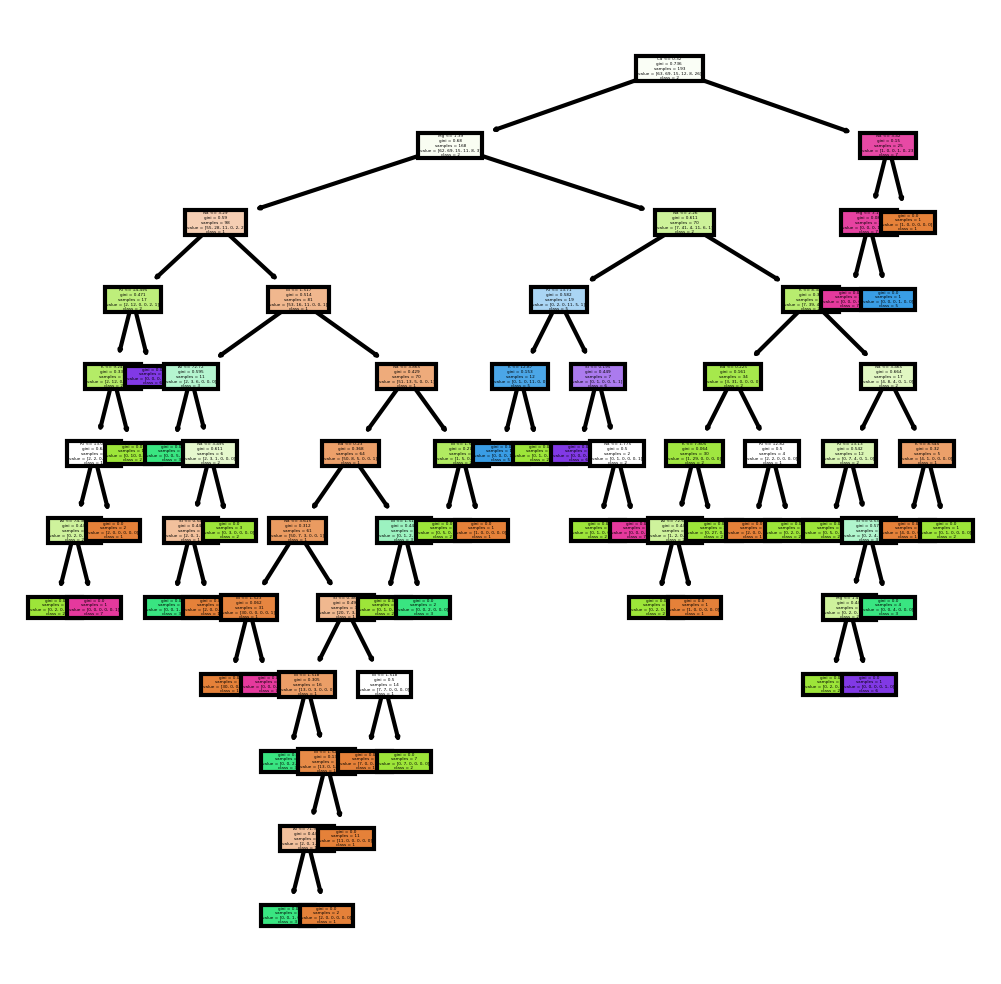

In [43]:
clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train_final, y_train_final)
y_pred_final = clf.predict(X_test_final)

fn = column_names
cn = ['1', '2', '3', '5', '6', '7']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);

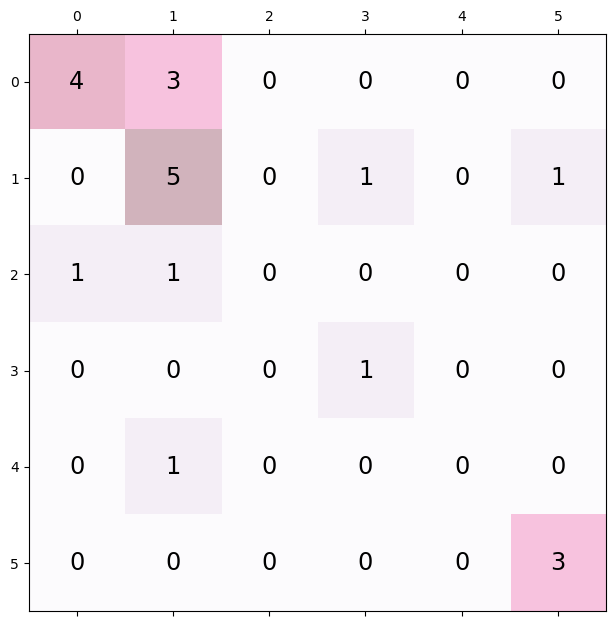

In [44]:
conf_matrix = metrics.confusion_matrix(y_test_final, y_pred_final)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap= 'PuRd', alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')